In [1]:
%load_ext autoreload
%autoreload 2
from kineticmodel import SRTM_Zhou2003, SRTM_Lammertsma1996

In [2]:
import numpy as np
#np.random.seed(0)

import scipy as sp
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

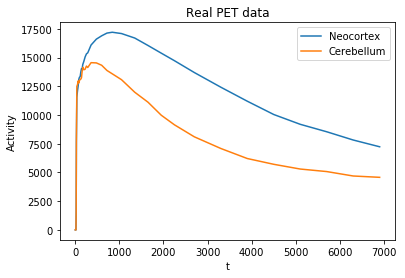

In [3]:
table=pd.read_table('SB086-nonPVE.txt')
table.columns

t= pd.Series.as_matrix(np.mean(table.iloc[:,[0, 1]], axis=1))
diff=np.diff(table.iloc[:,[0, 1]], axis=1)
dt=np.reshape(diff, np.product(diff.shape))
TAC=table.loc[:,'Neocortex']
refTAC=table.loc[:,'Total_cb']

fig, ax = plt.subplots();
ax.plot(t, TAC, label='Neocortex');
ax.plot(t, refTAC, label='Cerebellum');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Real PET data');
ax.legend();

In [6]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC, refTAC, time_unit='s')

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.58339675]),
 'R1': array([ 0.96565238]),
 'akaike': array([ 537.00957973]),
 'err': array([ 41.37346191]),
 'fpe': array([ 3053383.04888711]),
 'k2': array([ 0.07252271]),
 'logl': array([-264.50478986]),
 'mse': array([ 72699.59640207])}

In [7]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC, refTAC, time_unit='s')

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.58445412]),
 'R1': array([ 0.96389944]),
 'R1_lrsc': array([ nan]),
 'k2': array([ 0.07315396]),
 'k2_lrsc': array([ nan]),
 'k2a': array([ 0.04608623]),
 'k2a_lrsc': array([ nan]),
 'noiseVar_eqDVR': array([ 845691.68030291]),
 'noiseVar_eqR1': array([ 1865.41023974])}